In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import special

In [2]:
def normal_dist(x , mean , var):
    prob_density = 1 / (np.sqrt(2*np.pi)*var) * np.exp(-0.5*((x-mean)/var)**2)
    return prob_density

def normal_cdf(x, mean, var):
    return 0.5 * (
        1 + special.erf(
            (x - mean) / np.sqrt(var * 2)
        )
    )

# Kullback-Leibler divergence

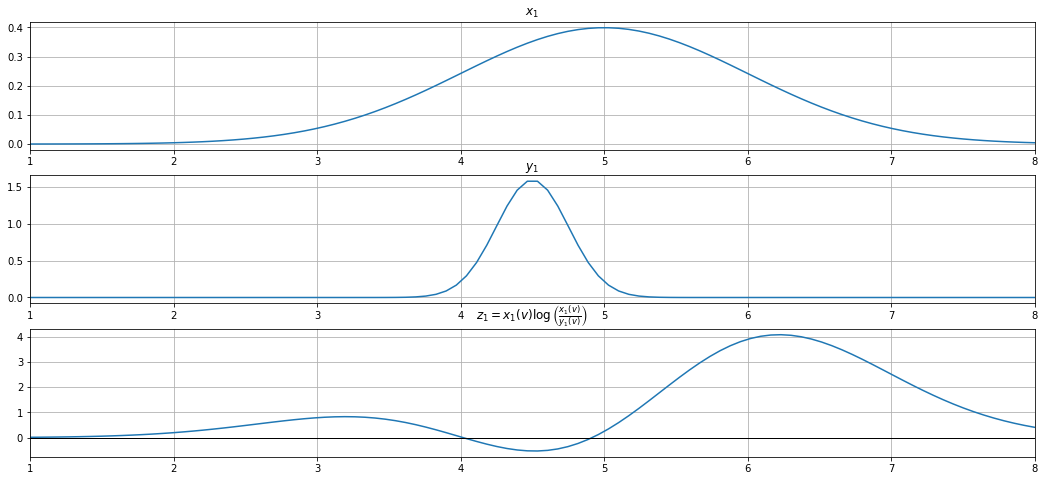

In [3]:
mu_x1 = 5
sigma_x1 = 1
mu_x2 = 1.5
sigma_x2 = 0.5

mu_y1 = 4.5
sigma_y1 = 0.5
mu_y2 = 5
sigma_y2 = 1

T_v = 100
v1 = np.linspace(1, 8, T_v)

x1 = normal_dist(v1, mu_x1, sigma_x1**2)
y1 = normal_dist(v1, mu_y1, sigma_y1**2)

z1 = x1 * np.log(1 / y1) - x1 * np.log(1 / x1)

plt.figure(figsize=(18,8))
plt.subplot(3,1,1)
plt.title(r'$x_1$')
plt.plot(v1, x1)
plt.xlim(1,8)
plt.grid()

plt.subplot(3,1,2)
plt.title(r'$y_1$')
plt.plot(v1, y1)
plt.xlim(1,8)
plt.grid()

plt.subplot(3,1,3)
plt.title(r'$z_1 = x_1(v) \log \left( \frac{x_1(v)}{y_1(v)} \right)$')
#plt.fill_between(v1, z1)
plt.plot(v1, z1)
plt.hlines(0, 0, 8, colors='k', lw=1)
plt.xlim(1,8)
plt.grid()

plt.show()

# Difference of PDF

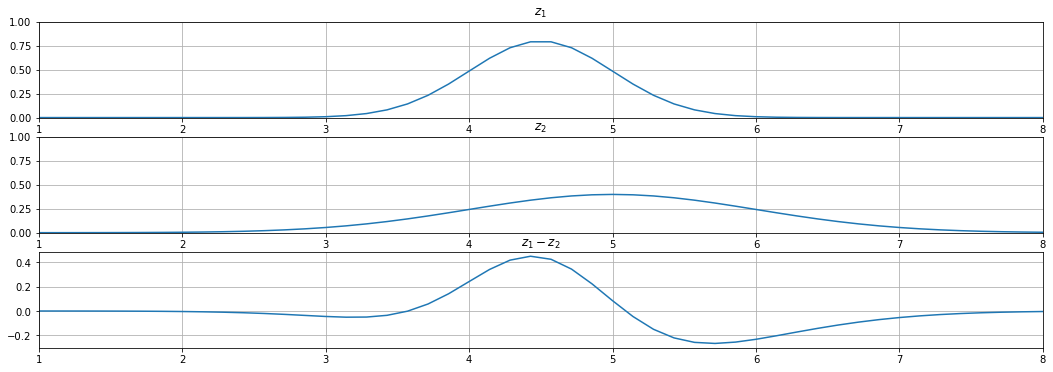

In [4]:
x = np.linspace(1,8)

z1 = normal_dist(x, 4.5, 0.5)
z2 = normal_dist(x, 5, 1)

plt.figure(figsize=(18,6))
plt.subplot(3,1,1)
plt.title(r'$z_1$')
plt.plot(x, z1)
plt.xlim(1,8)
plt.ylim(0, 1)
plt.grid()

plt.subplot(3,1,2)
plt.title(r'$z_2$')
plt.plot(x, z2)
plt.xlim(1,8)
plt.ylim(0, 1)
plt.grid()

plt.subplot(3,1,3)
plt.title(r'$z_1 - z_2$')
plt.plot(x, z1 - z2)
plt.xlim(1,8)
#plt.ylim(0, 1)
plt.grid()

plt.show()

# Difference of CDF

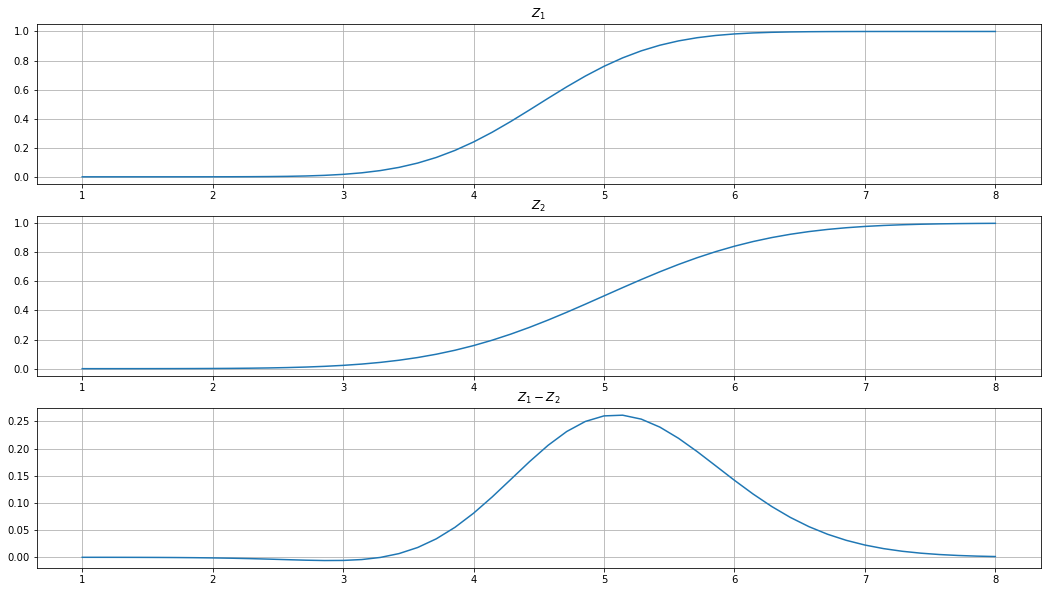

In [5]:
Z1 = normal_cdf(x, 4.5, 0.5)
Z2 = normal_cdf(x, 5, 1)

dZ = Z1 - Z2

plt.figure(figsize=(18,10))
plt.subplot(3,1,1)
plt.title(r'$Z_1$')
plt.plot(x, Z1)
plt.grid()

plt.subplot(3,1,2)
plt.title(r'$Z_2$')
plt.plot(x, Z2)
plt.grid()

plt.subplot(3,1,3)
plt.title(r'$Z_1 - Z_2$')
plt.plot(x, dZ)
plt.grid()

plt.show()

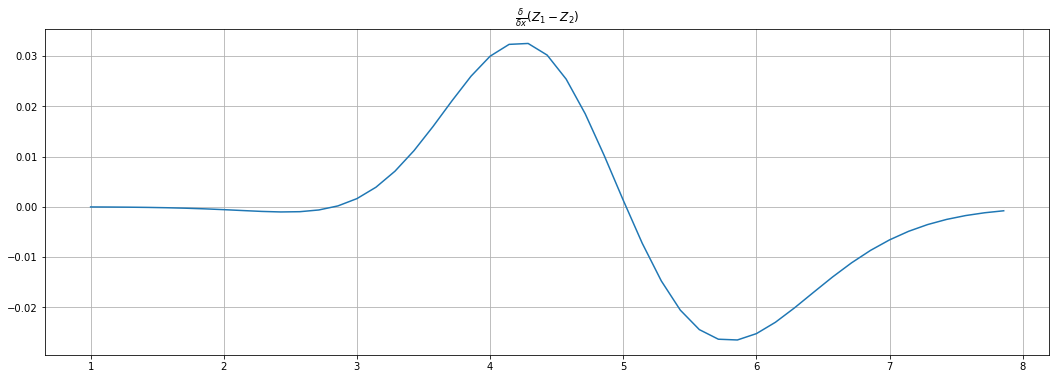

In [6]:
dz = np.diff(dZ)

plt.figure(figsize=(18,6))
plt.title(r'$\frac{\delta}{\delta x} (Z_1 - Z_2)$')
plt.plot(x[:-1], dz)
plt.grid()
plt.show()